In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img = cv2.imread('c:/3rd_project/data/images/lalaland.jpg')

In [3]:
img.shape

(2835, 1978, 3)

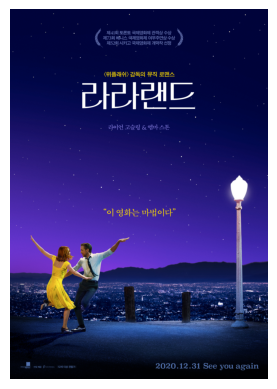

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

### 주색상 추출

주요 색상 (RGB):
(132, 93, 51)
(15, 20, 89)
(90, 48, 193)
(244, 243, 245)
(61, 44, 157)
(119, 129, 176)
(3, 6, 16)
(223, 186, 29)
(37, 31, 122)
(1, 7, 61)


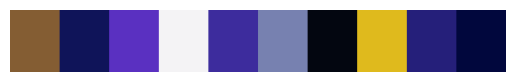

In [6]:
# 이미지 데이터를 1차원 배열로 변환
img_flat = img.reshape((-1, 3))

# K-means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=10)

# 클러스터링 수행
kmeans.fit(img_flat)

# 클러스터 중심을 얻어오고 이를 정수로 변환
colors = kmeans.cluster_centers_.astype(int)

# BGR에서 RGB로 변환
colors_rgb = colors[:, [2, 1, 0]]

# 주요 색상 출력
print("주요 색상 (RGB):")
for color in colors_rgb:
    print(tuple(color))

# 색상 팔레트 생성
color_palette = np.zeros((50, 400, 3), dtype=np.uint8)
for i, color in enumerate(colors_rgb):
    color_palette[:, i * 40:(i + 1) * 40, :] = color

# 이미지 표시
plt.imshow(color_palette)
plt.axis('off')
plt.show()

### OCR

In [7]:
# ! pip install pytesseract

38.79217155910786


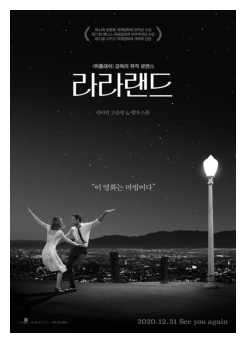

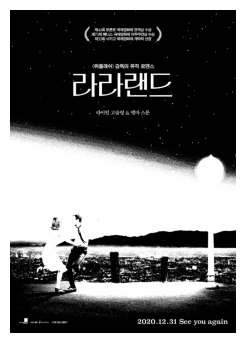

In [63]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

average_color = np.mean(gray_img, axis=(0, 1))
print(average_color)

# 이진화
_, binary_img = cv2.threshold(gray_img, average_color, 255, cv2.THRESH_BINARY)

plt.subplot(1,2,1)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

plt.subplot(1,2,2)
plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.show()

In [68]:
# 원본 이미지 크기
original_height, original_width = binary_img.shape[:2]

# 원하는 비율로 크기 조절 (예: 가로 크기를 50%로 줄임)
desired_scale = 0.3
new_width = int(original_width * desired_scale)
new_height = int(original_height * desired_scale)

# 이미지 크기 조절
resized_img = cv2.resize(binary_img, (new_width, new_height))

# 이미지 표시
cv2.imshow('Resized Image', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

config = ("-l kor+eng --oem 1 --psm 11")
# oem 0: Legacy 엔진 / 1: LSTM 엔진 / 2: Cube 엔진 / 3: Cube 및 LSTM 엔진 결합
# psm 6:자동페이지 세그먼트 / 11: 단어모드 / 12: 문장모드 / 13: 문단모드

text = pytesseract.image_to_string(binary_img, config=config)

print(text)

제 41 회 토론토 국 제 영화제 관 객 상 수상

제 73 회 베니스 국 제 영화제 여 우 주 연 상 수 상

제 52 회 시카고 국 제 영화제 개막작 선정

.

.

(RIE) 감 독 의 뮤직 로맨스

Cio

.

.

. 락 이 언 고 슬링 & 엠 마 스 톤

.

“

.

io

A

|

ER

13

Eel

fe

5

i

Ie

oF

ye

=

1g

고

hie

Er

#4:

EJ

Ss

=

Py

LY

…

igh

A.

ㅣ 뉴

난세

ha

dog

iy

==

14g 배 급 | §Fanorveva |12 세 이상 관 람 가 |

2020.12.31 See you again



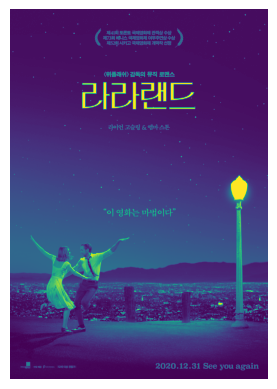

In [9]:
plt.imshow(gray)
plt.axis("off")
plt.show()

In [7]:
# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이미지에서 경계선을 검출
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# 컨투어 찾기
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 추출된 텍스트 영역을 저장할 빈 이미지 생성
result = img.copy()

# 각 컨투어에 대해
for contour in contours:
    # 컨투어의 경계상자를 얻음
    x, y, w, h = cv2.boundingRect(contour)
    
    # 경계상자 그리기 (선택 사항)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 1)
    
    # 추출된 텍스트 영역을 따로 저장 (선택 사항)
    text_region = img[y:y + h, x:x + w]
    cv2.imwrite('text_region.jpg', text_region)

# 결과 이미지 표시 (선택 사항)
cv2.imshow('Text Regions', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

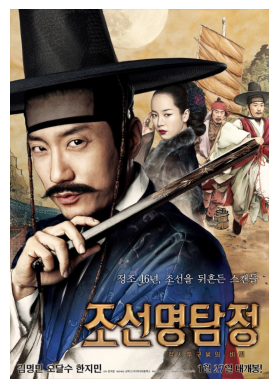

In [11]:
import cv2
from matplotlib import pyplot as plt
import imutils
from imutils.perspective import four_point_transform

img = cv2.imread('c:/3rd_project/data/images/movie/action/1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [13]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

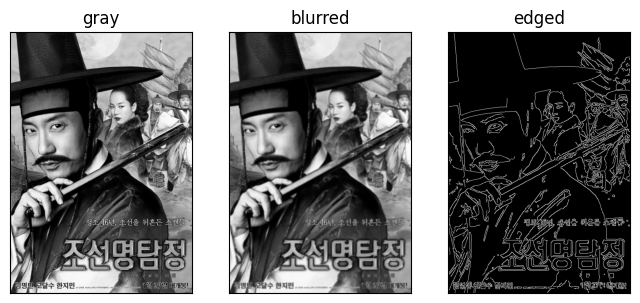

In [14]:
image = img.copy()
image = imutils.resize(image, width=500)
ratio = img.shape[1] / float(image.shape[1])
 
# 이미지를 grayscale로 변환하고 blur를 적용
# 모서리를 찾기위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
 
plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

In [35]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

config = ("-l kor+eng --oem 1 --psm 11")
# oem 0: Legacy 엔진 / 1: LSTM 엔진 / 2: Cube 엔진 / 3: Cube 및 LSTM 엔진 결합
# psm 6:자동페이지 세그먼트 / 11: 단어모드 / 12: 문장모드 / 13: 문단모드

text = pytesseract.image_to_string(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB), config=config)

print(text)

Ny

라기

이기

=

=

Ts

= 6

a

나)

6 ㄴ 2

iw

공기

2

Wr

7

1

oh 7

pd

»)

05

고

히 dt

=

©

i.

0 A BR. J

rile

Ee

부레 2



# train data 만들기

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def show_origin(img):   # 원본 이미지, 크기 출력
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    print(img_rgb.shape)

def color_hist(img):    # 원본 이미지 색 히스토그램 출력
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 그레이 이미지의 0번 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    # RGB 이미지의 각 채널에 대한 히스토그램 계산
    hist_b = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # 히스토그램 시각화
    plt.figure(figsize=(8, 6))
    plt.title('Color Histogram')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')

    # 그레이 히스토그램 채우기
    plt.fill_between(range(256), hist.flatten(), color='k', alpha=0.4, label='Histogram')

    # RGB 채널 히스토그램 그래프 그리기
    plt.plot(hist_b, color='b', label='Blue Channel')
    plt.plot(hist_g, color='g', label='Green Channel')
    plt.plot(hist_r, color='r', label='Red Channel')

    plt.xlim([0, 256])
    plt.legend()
    plt.show()

def brightness(img_path):   # 원본 이미지 밝기 계산
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image, (500, 750))  # (가로, 세로)

    brightness_value = round(img.mean() / 255 , 4)
    print(f"이미지 밝기 : {brightness_value}")

    return brightness_value

def main_3_color(img):  # 원본 이미지 대표 색상 3개 rgb 값 반환
    main_3_color_list = []

    # 이미지 데이터를 1차원 배열로 변환
    img_flat = img.reshape((-1, 3))

    # K-means 클러스터링 모델 생성
    kmeans = KMeans(n_clusters=3)

    # 클러스터링 수행
    kmeans.fit(img_flat)

    # 클러스터 중심을 얻어오고 이를 정수로 변환
    colors = kmeans.cluster_centers_.astype(int)

    # BGR에서 RGB로 변환
    colors_rgb = colors[:, [2, 1, 0]]

    # 주요 색상 출력
    print("주요 색상 (RGB):")
    for color in colors_rgb:
        print(tuple(color))
        main_3_color_list.append(color)

    # 색상 팔레트 생성
    color_palette = np.zeros((50, 120, 3), dtype=np.uint8)
    for i, color in enumerate(colors_rgb):
        color_palette[:, i * 40:(i + 1) * 40, :] = color

    # 이미지 표시
    plt.imshow(color_palette)
    plt.axis('off')
    plt.show()

    return main_3_color_list

In [74]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import cv2
# import tensorflow as tf

def image_sagmentation(img_path):   # 이미지 segmentation으로 개체 분류
    '''
    모델 호출
    '''
    new_model = YOLO('c:/3rd_project/yolov8_pt/230928_new_best.pt')   # Mask 모델
    # new_model = YOLO('c:/3rd_project/yolov8_pt/230926_new_best.pt')   # Mask 모델
    # new_model = YOLO('c:/3rd_project/yolov8_pt/yolov8n-seg.pt')   # Mask 모델

    '''
    이미지 적용
    '''
    image = cv2.imread(img_path)
    img = cv2.resize(image, (320, 448))  # (가로, 세로)
    results = list(new_model.predict(source=img,
                                    conf=0.3, show=True, stream=True))
    #                                 예측률0.5초과                      detect할 클래스만 classes=[0, 2, ...] 추가
    #                                                                   없는 경우 생략

    '''
    이미지 출력
    '''
    res_plotted = results[0].plot()
    plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
    cv2.waitKey()
    cv2.destroyAllWindows()
    plt.axis('off')
    plt.show()

    '''
    개체 수 출력
    '''
    # gpu => cpu
    cls_cpu = results[0].boxes.cls.to('cpu').to(int)
    # cpu => list
    cls_list = cls_cpu.tolist()

    from collections import Counter

    cls_counts = Counter(cls_list)
    print(cls_counts)

    # 클래스 이름과 개수를 연결하는 딕셔너리 생성
    class_names = {
        new_model.names[class_idx]: str(count)
        for class_idx, count in cls_counts.items()
    }

    # 모든 키-값 쌍을 반복하고 출력
    for class_name, class_value in class_names.items():
        print(f"Class: {class_name}\t\tValue: {class_value}")

    model_classes = new_model.names.items()
    
    return class_names, model_classes

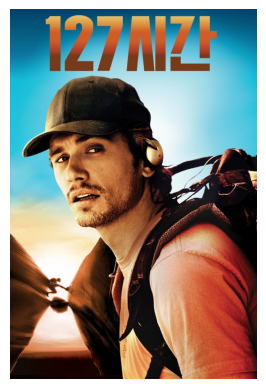

(3000, 2000, 3)


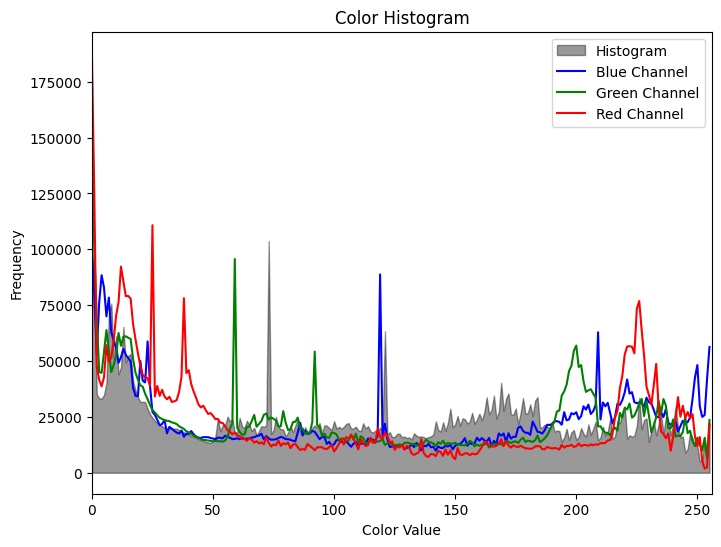

이미지 밝기 : 0.4454
주요 색상 (RGB):
(159, 210, 212)
(36, 31, 31)
(192, 106, 64)


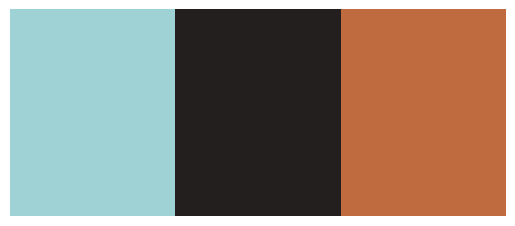


0: 448x320 1 dog, 1 person, 16.4ms
Speed: 0.0ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 320)


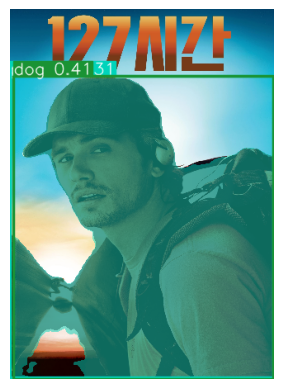

Counter({28: 1, 49: 1})
Class: dog		Value: 1
Class: person		Value: 1


In [90]:
import cv2
from matplotlib import pyplot as plt
import imutils
from imutils.perspective import four_point_transform

import tensorflow as tf

with tf.device('/GPU:0'):

    img_path = 'c:/3rd_project/data/images/movie/horror/4.jpg'
    img = cv2.imread(img_path)


    show_origin(img)

    color_hist(img)

    brightness_value = brightness(img_path)

    main_3_color_list = main_3_color(img)

    i_s = image_sagmentation(img_path)

In [11]:
print(brightness)
print(main_3_color)
print(i_s)

84.34456437603706
[array([38, 34, 26]), array([218, 215, 207]), array([114, 104,  86])]
({'person': '4'}, dict_items([(0, 'person'), (1, 'bicycle'), (2, 'car'), (3, 'motorcycle'), (4, 'airplane'), (5, 'bus'), (6, 'train'), (7, 'truck'), (8, 'boat'), (9, 'traffic light'), (10, 'fire hydrant'), (11, 'stop sign'), (12, 'parking meter'), (13, 'bench'), (14, 'bird'), (15, 'cat'), (16, 'dog'), (17, 'horse'), (18, 'sheep'), (19, 'cow'), (20, 'elephant'), (21, 'bear'), (22, 'zebra'), (23, 'giraffe'), (24, 'backpack'), (25, 'umbrella'), (26, 'handbag'), (27, 'tie'), (28, 'suitcase'), (29, 'frisbee'), (30, 'skis'), (31, 'snowboard'), (32, 'sports ball'), (33, 'kite'), (34, 'baseball bat'), (35, 'baseball glove'), (36, 'skateboard'), (37, 'surfboard'), (38, 'tennis racket'), (39, 'bottle'), (40, 'wine glass'), (41, 'cup'), (42, 'fork'), (43, 'knife'), (44, 'spoon'), (45, 'bowl'), (46, 'banana'), (47, 'apple'), (48, 'sandwich'), (49, 'orange'), (50, 'broccoli'), (51, 'carrot'), (52, 'hot dog'), (5

In [27]:
main_3_color[0].tolist()

[38, 34, 26]

In [18]:
# i_s[1]에서 클래스 이름 추출
class_names = [class_name for _, class_name in i_s[1]]

# 클래스 이름 리스트 출력
print(class_names)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'Gun']


In [28]:
columns = class_names.copy()  # class_names 리스트를 복사하여 columns 변수에 할당

# 'name'을 'columns' 리스트의 맨 앞에 추가
columns.insert(0, 'img_name')

# 'genre'을 'columns' 리스트의 끝에 추가
columns.extend(['brightness', 'color_1_r', 'color_1_g', 'color_1_b',
                'color_2_r', 'color_2_g', 'color_2_b',
                'color_3_r','color_3_g', 'color_3_b','genre'])

In [29]:
print(columns)

['img_name', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'Gun', 'brightness', 'color_1_r', 'color_1_g', 'color_1_b', 'color_2_r', 'color_2_g', 'color_2_b', 'color_3_r', 'color_3_g', '

In [30]:
import pandas as pd

df = pd.DataFrame(columns=columns)
df

,img_name,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat,...,color_1_r,color_1_g,color_1_b,color_2_r,color_2_g,color_2_b,color_3_r,color_3_g,color_3_b,genre


In [31]:
genre = img_path.split('/')[-2]
name = img_path.split('/')[-1]
img_name = f"{genre}_{name}"

print(genre)
print(name)
print(img_name)

action
164.jpg
action_164.jpg


In [32]:
color_1 = main_3_color[0].tolist()
color_2 = main_3_color[1].tolist()
color_3 = main_3_color[2].tolist()

for i in range(1):
    for key, value in i_s[0].items():
        df.loc[i, 'img_name'] = img_name
        df.loc[i, 'brightness'] = round(brightness / 255, 4)
        df.loc[i, 'color_1_r'] = color_1[0]
        df.loc[i, 'color_1_g'] = color_1[1]
        df.loc[i, 'color_1_b'] = color_1[2]
        df.loc[i, 'color_2_r'] = color_2[0]
        df.loc[i, 'color_2_g'] = color_2[1]
        df.loc[i, 'color_2_b'] = color_2[2]
        df.loc[i, 'color_3_r'] = color_3[0]
        df.loc[i, 'color_3_g'] = color_3[1]
        df.loc[i, 'color_3_b'] = color_3[2]
        df.loc[i, 'genre'] = genre
        if key in df.columns:
            df.loc[i, key] = value

person
4


In [40]:
df = df.fillna(0)
df

,img_name,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat,...,color_1_r,color_1_g,color_1_b,color_2_r,color_2_g,color_2_b,color_3_r,color_3_g,color_3_b,genre
0,action_164.jpg,4,0,0,0,0,0,0,0,0,...,38,34,26,218,215,207,114,104,86,action


In [41]:
df[df.columns[-13:]]

,toothbrush,Gun,brightness,color_1_r,color_1_g,color_1_b,color_2_r,color_2_g,color_2_b,color_3_r,color_3_g,color_3_b,genre
0,0,0,0.3308,38,34,26,218,215,207,114,104,86,action


액션 폴더 파일 리스트 가져오기

In [166]:
import os

folder_path = 'c:/3rd_project/data/images/movie/action'
files = os.listdir(folder_path)

print(files)
print(len(files))

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.j

In [ ]:
img_path = 'c:/3rd_project/data/images/movie/action/164.jpg'
img = cv2.imread(img_path)

brightness = brightness(img_path)

main_3_color = main_3_color(img)

i_s = image_sagmentation(img_path)

In [ ]:
# # i_s[1]에서 클래스 이름 추출
# class_names = [class_name for _, class_name in i_s[1]]

# columns = class_names.copy()  # class_names 리스트를 복사하여 columns 변수에 할당

# # 'name'을 'columns' 리스트의 맨 앞에 추가
# columns.insert(0, 'img_name')

# # 'genre'을 'columns' 리스트의 끝에 추가
# columns.extend(['brightness', 'color_1_r', 'color_1_g', 'color_1_b',
#                 'color_2_r', 'color_2_g', 'color_2_b',
#                 'color_3_r','color_3_g', 'color_3_b','genre'])


# df = pd.DataFrame(columns=columns)
# df

In [168]:
import cv2
from matplotlib import pyplot as plt
import imutils
from imutils.perspective import four_point_transform
import tqdm
import pandas as pd

for i, file in tqdm(enumerate(files)):
    file_path = f"c:/3rd_project/data/images/movie/action/{file}"
    img = cv2.imread(file_path)

    brightness = brightness(file_path)
    main_3_color = main_3_color(img)
    i_s = image_sagmentation(file_path) # 230925_c.pt 모델 가중치로 돌리셈

    color_1 = main_3_color[0].tolist()
    color_2 = main_3_color[1].tolist()
    color_3 = main_3_color[2].tolist()

    genre = file_path.split('/')[-2]
    name = file_path.split('/')[-1]
    img_name = f"{genre}_{name}"

    for key, value in i_s[0].items():
        df.loc[i, 'img_name'] = img_name
        df.loc[i, 'brightness'] = round(brightness / 255, 4)
        df.loc[i, 'color_1_r'] = color_1[0]
        df.loc[i, 'color_1_g'] = color_1[1]
        df.loc[i, 'color_1_b'] = color_1[2]
        df.loc[i, 'color_2_r'] = color_2[0]
        df.loc[i, 'color_2_g'] = color_2[1]
        df.loc[i, 'color_2_b'] = color_2[2]
        df.loc[i, 'color_3_r'] = color_3[0]
        df.loc[i, 'color_3_g'] = color_3[1]
        df.loc[i, 'color_3_b'] = color_3[2]
        df.loc[i, 'genre'] = genre
        if key in df.columns:
            df.loc[i, key] = value

df = df.fillna(0)
df.to_csv('c:/3rd_project/data/Train/action_movie.csv', index=None)

c:/3rd_project/data/images/movie/action/0.jpg
c:/3rd_project/data/images/movie/action/1.jpg
c:/3rd_project/data/images/movie/action/10.jpg
c:/3rd_project/data/images/movie/action/100.jpg
c:/3rd_project/data/images/movie/action/1000.jpg
c:/3rd_project/data/images/movie/action/1001.jpg
c:/3rd_project/data/images/movie/action/1002.jpg
c:/3rd_project/data/images/movie/action/1003.jpg
c:/3rd_project/data/images/movie/action/1004.jpg
c:/3rd_project/data/images/movie/action/1005.jpg
c:/3rd_project/data/images/movie/action/1006.jpg
c:/3rd_project/data/images/movie/action/1007.jpg
c:/3rd_project/data/images/movie/action/1008.jpg
c:/3rd_project/data/images/movie/action/1009.jpg
c:/3rd_project/data/images/movie/action/101.jpg
c:/3rd_project/data/images/movie/action/1010.jpg
c:/3rd_project/data/images/movie/action/1011.jpg
c:/3rd_project/data/images/movie/action/1012.jpg
c:/3rd_project/data/images/movie/action/1013.jpg
c:/3rd_project/data/images/movie/action/1014.jpg
c:/3rd_project/data/images/mov